In [63]:
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
import seaborn as srn

In [37]:
df = pd.read_csv('/content/sample_data/Online Retail.csv')

In [38]:
df.shape

(541909, 9)

In [114]:
df.describe()

,index,Quantity,UnitPrice,CustomerID,Totalamount,Monthofpurchase,Yearofpurchase
count,406829.000000,406829.000000,406829.000000,406829.000000,406829.000000,406829.000000,406829.000000
mean,278048.159318,12.061303,3.460471,15287.690570,20.401854,7.605947,2010.934002
std,152744.019884,248.693370,69.315162,1713.600303,427.591718,3.418942,0.248279
min,0.000000,-80995.000000,0.000000,12346.000000,-168469.600000,1.000000,2010.000000
25%,147749.000000,2.000000,1.250000,13953.000000,4.200000,5.000000,2011.000000
50%,284435.000000,5.000000,1.950000,15152.000000,11.100000,8.000000,2011.000000
75%,409528.000000,12.000000,3.750000,16791.000000,19.500000,11.000000,2011.000000
max,541908.000000,80995.000000,38970.000000,18287.000000,168469.600000,12.000000,2011.000000


In [115]:
df.size

4881948

In [42]:
df.dropna(inplace = True)

In [44]:
df['Quantity'] = df['Quantity'].astype('int64')

In [45]:
df['CustomerID'] = df['CustomerID'].astype('int64')

In [46]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [95]:
df['Totalamount'] = df['UnitPrice']*df['Quantity']
df['Monthofpurchase'] = df['InvoiceDate'].dt.month
df['Yearofpurchase'] = df['InvoiceDate'].dt.year

In [116]:
cols = ['CustomerID','Country','StockCode']
for col in cols:
  if col == 'CustomerID':
    print('The total number of unique customers are {}'.format(len(df['CustomerID'].unique())))
  elif col == 'Country':
    print('Sales are made from {} countries'.format(len(df['Country'].unique())))
  else:
     print('The total number of unique products purchased are {}'.format(len(df['StockCode'].unique())))


The total number of unique customers are 4372
Sales are made from 37 countries
The total number of unique products purchased are 3684


In [112]:
monthlysales_df = df[['Monthofpurchase','Yearofpurchase','Totalamount']].groupby(['Monthofpurchase','Yearofpurchase']).agg({'Totalamount':'sum'}).sort_values(by=['Yearofpurchase','Monthofpurchase','Totalamount'],ascending = [True,True,False])

,,Totalamount
Monthofpurchase,Yearofpurchase,
12,2010,554604.020
1,2011,475074.380
2,2011,436546.150
3,2011,579964.610
4,2011,426047.851
5,2011,648251.080
6,2011,608013.160
7,2011,574238.481
8,2011,616368.000


Text(0, 0.5, 'Monthly sales')

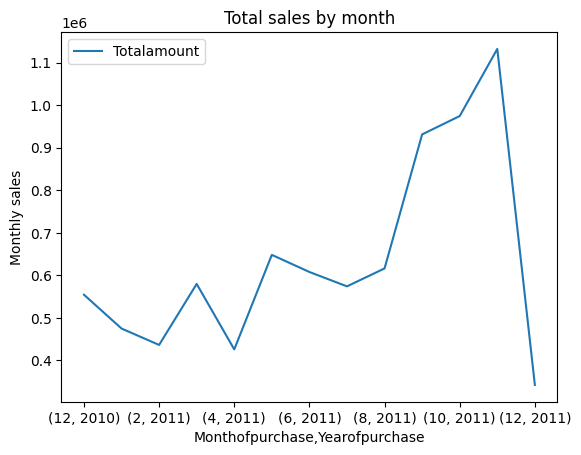

In [113]:
display(monthlysales_df)
monthly_sales_df = monthlysales_df.head(20)
monthly_sales_df.plot(kind = 'line',y='Totalamount')
plt.title('Total sales by month')
plt.ylabel('Monthly sales')

In [77]:
top_5_revenue_generating_countries_df = df[['Country', 'Totalamount']].groupby(['Country'])['Totalamount'].sum().sort_values(ascending=False)
top_five_countries_df = top_5_revenue_generating_countries_df.head(5)

Text(0.5, 0, 'Totalamount')

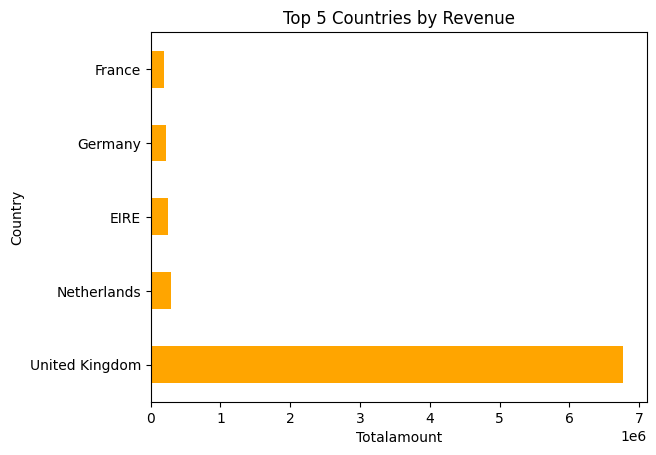

In [82]:
top_five_countries_df.plot(kind = 'barh', x = 'Country', y = 'Totalamount', color = 'Orange')
plt.title('Top 5 Countries by Revenue')
plt.xlabel('Totalamount')

Text(0.5, 1.0, 'Top 20 products by Sales and Quantity')

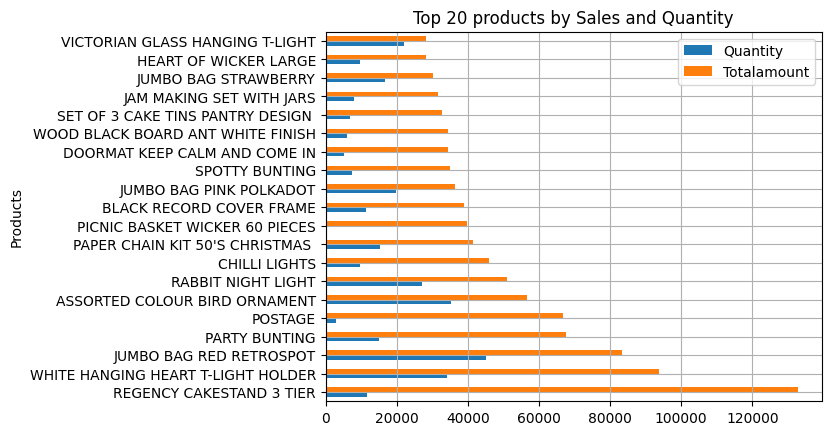

In [88]:
top_20_products_df = df[['Description', 'Quantity', 'Totalamount']].groupby(['Description']).agg({'Totalamount': 'sum', 'Quantity': 'sum'}).sort_values(by=['Totalamount'], ascending=False)
top_20_producttypes_df = top_20_products_df.head(20)
top_20_producttypes_df.plot(kind = 'barh', y =['Quantity','Totalamount'])
plt.ylabel('Products')
plt.grid(axis = 'both')
plt.title('Top 20 products by Sales and Quantity')